In [1]:
import warnings
warnings.filterwarnings('ignore')
from utils import future, continuous_future, history, bundle_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
con = continuous_future('ES', 
                       offset=0,
                       adjustment='mul',
                       roll_style='volume')

In [3]:
his = history([con,], 
              end_dt=pd.Timestamp('2018-10-31', tz='UTC'),
              bar_count=1260,
              frequency='1d',
              field='price',
              data_frequency='daily'
             )
his.columns = ['price']

In [4]:
his.tail()

,price
2018-10-25 00:00:00+00:00,2688.25
2018-10-26 00:00:00+00:00,2669.50
2018-10-29 00:00:00+00:00,2643.50
2018-10-30 00:00:00+00:00,2685.25
2018-10-31 00:00:00+00:00,2711.00


In [5]:
periods = 63
his['daily_returns'] = his.price.pct_change()
his['weekly_returns'] = his.price.pct_change(5)
his['monthly_returns'] = his.price.pct_change(21)
his['daily_std'] = his.daily_returns.rolling(periods).std() * np.sqrt(252)
his['weekly_std'] = his.weekly_returns.rolling(periods).std() * np.sqrt(52)
his['monthly_std'] = his.monthly_returns.rolling(periods).std() * np.sqrt(12)
his.tail()

,price,daily_returns,weekly_returns,monthly_returns,daily_std,weekly_std,monthly_std
2018-10-25 00:00:00+00:00,2688.25,0.009008,-0.030300,-0.076679,0.132916,0.127070,0.107346
2018-10-26 00:00:00+00:00,2669.50,-0.006975,-0.035411,-0.085788,0.133224,0.130455,0.113626
2018-10-29 00:00:00+00:00,2643.50,-0.009740,-0.040994,-0.094382,0.133906,0.134825,0.120258
2018-10-30 00:00:00+00:00,2685.25,0.015793,-0.022212,-0.083532,0.138023,0.135703,0.124913
2018-10-31 00:00:00+00:00,2711.00,0.009589,0.017547,-0.074270,0.138854,0.137136,0.127320


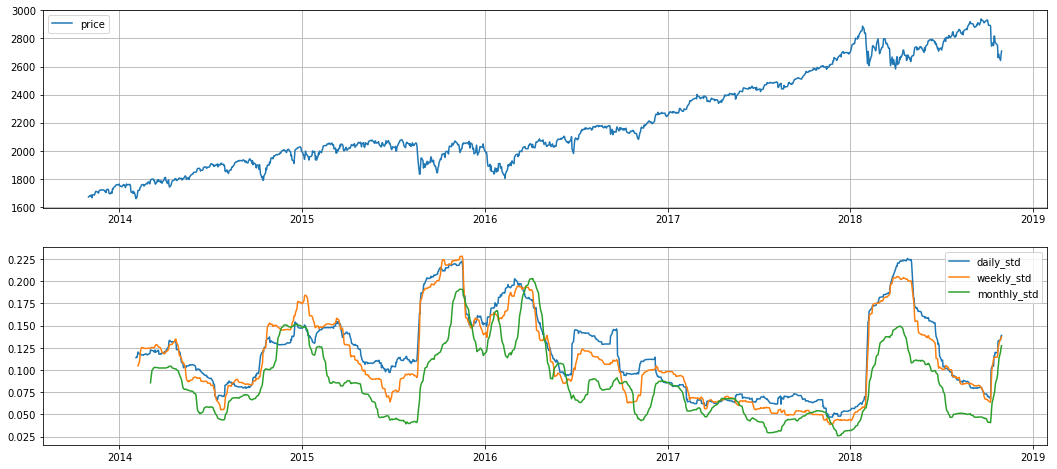

In [6]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(211)
ax.plot(his['price'])
ax.legend()
ax.grid()
ax1 = fig.add_subplot(212, sharex=ax)
ax1.plot(his.daily_std)
ax1.plot(his.weekly_std)
ax1.plot(his.monthly_std)
ax1.legend()
ax1.grid()
plt.show();